# Eyes on the Water: River-Pedia

## Data preparation

### **The only thing you need to change for running the code for river health monitoring is the path to the directory containing the images**

In [1]:
img_dir = './Evaluation Dataset Images'

### Set up the dataset for testing

This code block helps you to make sure that all files are in jpg format, you only need to run once for each dataset.

In [2]:
# This code block helps you to make sure that all files are in jpg format, you only need to run once for each dataset

# import glob
# import os
# import warnings
# warnings.filterwarnings('ignore')

# files = glob.glob(img_dir + '/*')
# for file in files:
#     base = os.path.splitext(file)[0]
#     new_file = base + '.jpg'
#     os.rename(file, new_file)
# print("All files have been renamed to .jpg format.")


In [3]:
from utils_RHM.tools import process_directory, process_dataset, load_saved_model
import torch
process_directory(img_dir)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_data , model = process_dataset(img_dir,device)

Saving to /Data/home/Dennis/CV_in_Construction/CAE_hackathon/MainCategoryClassification/Evaluation Dataset Images/_classes.csv


## Create prediction results

In [4]:
model = load_saved_model('./pretrained_model/classification.pt',model)
from utils_RHM.tools import evaluate_model
all_predictions = evaluate_model(img_data , model , device)

### You can visiualize the predictuion results here

You can modify the **multiple** argument to see single (**multiple = False**) or multiple (**multiple = True**) images' prediction results. If you set the **save** argument to true , the prediction result image will save under your current directory.

Category classifified by the model:
Modified_Channel 85.59%


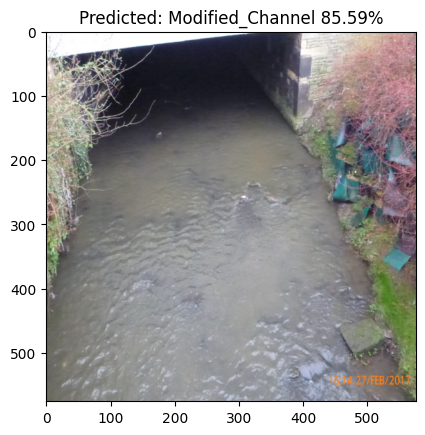

In [5]:
from utils_RHM.tools import visualize_result
visualize_result(img_data, all_predictions , multiple = False , save = False)

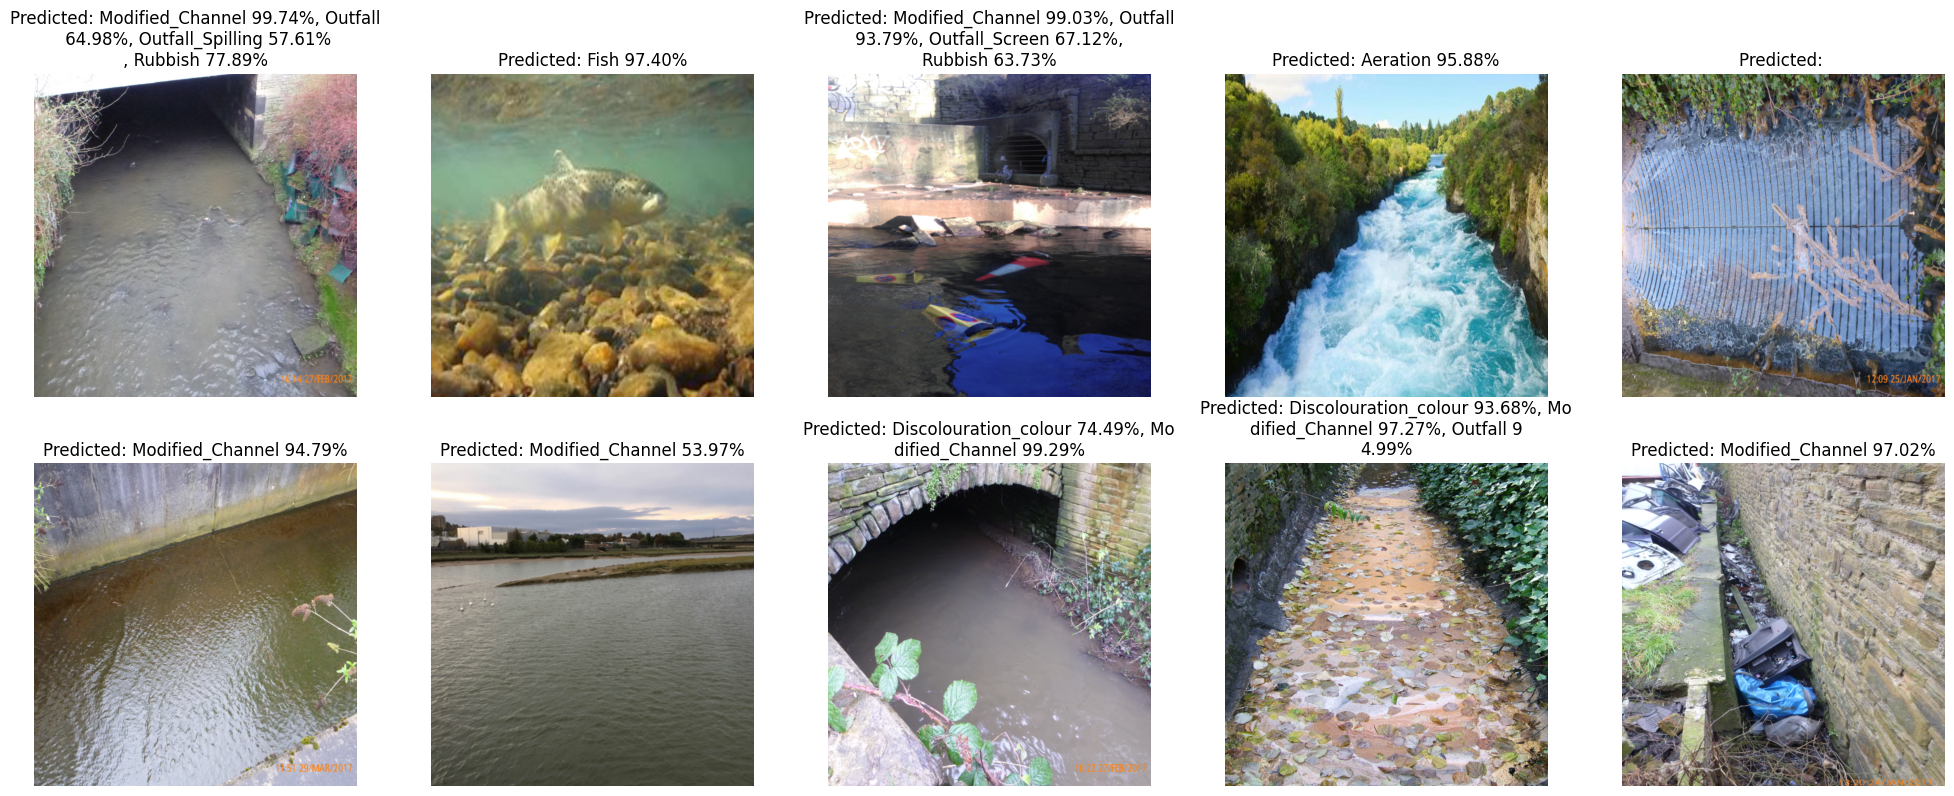

In [6]:
visualize_result(img_data,all_predictions,multiple = True , save = False)

## Help us label the data

Category classifified by the model:
Modified_Channel 91.70%
Outfall 96.54%
Some detected pollutions suggested by our system ( objects that were not detected require your assistance):
Proportion_Modification: 35.03768628641578%


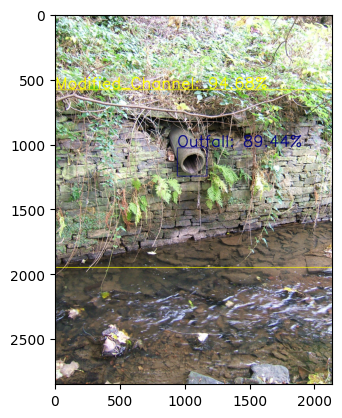

In [7]:
from utils_RHM.tools import label_helper
label_helper(model, image_path = 'Assets/GBR201600000000003.jpg' , device = device)